<p style="color:#153462; 
          font-weight: bold; 
          font-size: 30px; 
          font-family: Gill Sans, sans-serif; 
          text-align: center;">
          Basics of PyTorch</p>

Tensors are arrays. 0-D tensor is just a number like, 1, 2, .5, 10 etc.., and 1-D tensors are just an array of numbers. For example a row in database table, vectors and time series data etc..,

### Importing Required Modules

In [1]:
import torch

In [2]:
# To check version
torch.__version__

'2.0.0+cu117'

In [3]:
import pandas as pd
import numpy as np

In [4]:
import matplotlib.pyplot as plt

### Creation of Tensor & Type Check

In [5]:
# Creating a tensor
a = torch.tensor([1, 2, 3, 4])

# can also create a tensor using below Tensor class
# x = torch.Tensor([1, 2, 3])

In [6]:
a.type(), a.dtype

('torch.LongTensor', torch.int64)

Below is the pytorch data types,
<img src="images/data_types.png" alt="data_types" style="width: 800px;"/>

In [7]:
# Creating a tensor with different data types
torch.tensor([1, 0.23, 34.23, -1, 0, .34])

tensor([ 1.0000,  0.2300, 34.2300, -1.0000,  0.0000,  0.3400])

### Accessing and Updating Tensor values

In [8]:
# accessing tensor values. Individual values of tensor also treated as tensors
a[0], a[:3]

(tensor(1), tensor([1, 2, 3]))

In [9]:
# To get python number from a tensor
a[0].item()

1

In [10]:
# Updating Tensor values
a[0] = 200
a

tensor([200,   2,   3,   4])

In [11]:
# To update multiple tensor values, we need a tensor values only. 
# Passing below error throws an Error
a[2:4] = [500, 300]
a

TypeError: can't assign a list to a torch.LongTensor

In [12]:
a[2:4] = torch.Tensor([500, 900])
a

tensor([200,   2, 500, 900])

In [13]:
# To Accessing and updating multiple index values
data = torch.tensor(range(0, 10), dtype=torch.int64)
print(F"Original Tensor Data: {data}")
print(F"Accessing index values of 1, 7, 9: {data[[1, 7, 9]]}")
data[[1, 7, 9]] = 999
print(F"Updating index values of 1, 7, 9 to 999: {data}")

Original Tensor Data: tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
Accessing index values of 1, 7, 9: tensor([1, 7, 9])
Updating index values of 1, 7, 9 to 999: tensor([  0, 999,   2,   3,   4,   5,   6, 999,   8, 999])


### Type Conversion, Size, Dimention & Shape of Tensor 

In [14]:
# Creating a tensor with float values
a = torch.tensor([1, 2, 3, 4])
b = torch.tensor([1.0, 0.2, 4, 45.234])
b

tensor([ 1.0000,  0.2000,  4.0000, 45.2340])

In [15]:
b.type(), b.dtype

('torch.FloatTensor', torch.float32)

In [16]:
# We can specify dtype while creating tensor also
c = torch.tensor([1.0, 0.2, 4, 45.234], dtype=torch.int64)
print(F"Converted from Float tensor to Int tensor: {c}")

Converted from Float tensor to Int tensor: tensor([ 1,  0,  4, 45])


In [17]:
# To create tensor with explicit data type
torch.FloatTensor([1, 2, 0.4, 0.98])

tensor([1.0000, 2.0000, 0.4000, 0.9800])

In [18]:
# To convert one data type to other
print(F"Before Converting Int Tensor to Float Tensor: {a}")
a = a.type(torch.FloatTensor)
print(F"Converting Int Tensor to Float Tensor: {a}")

Before Converting Int Tensor to Float Tensor: tensor([1, 2, 3, 4])
Converting Int Tensor to Float Tensor: tensor([1., 2., 3., 4.])


In [19]:
# To check the size
a.size()

torch.Size([4])

In [20]:
a.size(dim=0)

4

In [21]:
# To check its dimention
a.ndimension()

1

In [22]:
a.shape

torch.Size([4])

### Reshaping Tensor

In [23]:
a = torch.tensor([1, 2, 3, 4])

In [24]:
# To change it to 2D array
a.view(4, 1)

tensor([[1],
        [2],
        [3],
        [4]])

In [25]:
# Another way to change the shape, you can use -1 for one dimention if you don't
# know exact value
a.view(-1, 2)

tensor([[1, 2],
        [3, 4]])

In [26]:
a.view(-1, 4)

tensor([[1, 2, 3, 4]])

In [27]:
a.view(-1)

tensor([1, 2, 3, 4])

In [28]:
y = a.view(2,2)
y

tensor([[1, 2],
        [3, 4]])

In [29]:
y.ndimension(), y.shape

(2, torch.Size([2, 2]))

### Concatenation

Concatenates the given sequence of seq tensors in the given dimension. All tensors must either have the same shape (except in the concatenating dimension) or be empty. This concatenation step frequently used in neural networks

In [30]:
torch.tensor([[1, 2, 3, 4]]).shape

torch.Size([1, 4])

In [31]:
data = [torch.tensor([[1, 2, 3, 4]]), torch.tensor([[4, 5, 6, 7]])]

In [32]:
torch.cat(data, dim=0)

tensor([[1, 2, 3, 4],
        [4, 5, 6, 7]])

In [33]:
torch.cat(data, dim=1)

tensor([[1, 2, 3, 4, 4, 5, 6, 7]])

### Creating tensor from different data types and vice versa

In [34]:
# From numpy array to Tensor
numpy_array = np.array([1, 2, 3 ,4.0])
torch_tensor = torch.from_numpy(numpy_array)
torch_tensor

tensor([1., 2., 3., 4.], dtype=torch.float64)

In [35]:
# Converting back to numpy array
back_to_array = torch_tensor.numpy()
back_to_array

array([1., 2., 3., 4.])

In [36]:
# To convert pandas array to Tensor
pandas_series = pd.Series([1, 2, 3, 4, 5])
pandas_to_tensor = torch.from_numpy(pandas_series.values)
pandas_to_tensor

tensor([1, 2, 3, 4, 5])

In [37]:
# To canvert pandas tensor to list
pandas_to_tensor.tolist()

[1, 2, 3, 4, 5]

### Vector Operations

In [38]:
# Vector addition
u = torch.tensor([0, 1])
v = torch.tensor([1, 0])
t = u + v
t

tensor([1, 1])

In [39]:
# Vetor multiplication with scalar
x = torch.tensor([1, 2, 3, 4, 5])
z = 2 * x
z

tensor([ 2,  4,  6,  8, 10])

In [40]:
# Adding vectors of 2 different data types, in old versions of pytorch this might create an error.
int_values = torch.IntTensor([1, 2, 4])
float_values = torch.FloatTensor([2.3, 3, 5])
int_values + float_values

tensor([3.3000, 5.0000, 9.0000])

In [41]:
# dot product
# 2*3 + 4 * 1
m = torch.tensor([2, 4])
n = torch.tensor([3, 1])
torch.dot(m, n)

tensor(10)

### Matrix Operations

In [42]:
# Element wise multiplication. Also known as Hadamard product, element-wise product, entrywise product.
x = torch.tensor([[1, 2, 4], 
                  [3, 4, 10]])
y = torch.tensor([[1, 2, 3], 
                  [5, 6, 7]])

In [43]:
torch.mul(x, y)

tensor([[ 1,  4, 12],
        [15, 24, 70]])

In [44]:
x*y

tensor([[ 1,  4, 12],
        [15, 24, 70]])

In [45]:
# dot product
torch.dot(x, y)

RuntimeError: 1D tensors expected, but got 2D and 2D tensors

In [ ]:
# matrix multiplication, also known as dot product.
x = torch.tensor([[1, 2], 
                  [3, 4]])
y = torch.tensor([[1, 2, 3], 
                  [5, 6, 7]])
torch.mm(x, y)

### PyTorch Mathematical and Statistical methods

In [ ]:
math_tensor = torch.tensor([1, 2, 3, 4], dtype=torch.float64)
# NOTE: Mean input dtype must be either a floating point or complex dtype
print(f"Mean of tensor: {math_tensor.mean()}")
print(f"STD  of tensor: {math_tensor.std()}")
print(f"Min value in tensor: {math_tensor.min()}")
print(f"Max value in tensor: {math_tensor.max()}")

<img src="images/trignometric_table.png" alt="trignometry" style="width: 800px;"/>

In [46]:
# Applying trignometric functions on Tensor
radians_tensor = torch.tensor([0, np.pi/6, np.pi/4, np.pi/3, np.pi/2, np.pi, 3*(np.pi)/2, 2*(np.pi)])
radians_tensor

tensor([0.0000, 0.5236, 0.7854, 1.0472, 1.5708, 3.1416, 4.7124, 6.2832])

In [47]:
print(F"Sin values of Tensor: {torch.sin(radians_tensor)}")

Sin values of Tensor: tensor([ 0.0000e+00,  5.0000e-01,  7.0711e-01,  8.6603e-01,  1.0000e+00,
        -8.7423e-08, -1.0000e+00,  1.7485e-07])


### torch.linspace(start, end, step)

A useful function for plotting mathematical functions is <code>torch.linspace()</code>. <code>torch.linspace()</code> returns evenly spaced numbers over a specified interval. You specify the starting point of the sequence and the ending point of the sequence. The parameter <code>steps</code> indicates the number of samples to generate. Now, you'll work with <code>steps = 5</code>.

In [48]:
torch.linspace(1, 5, steps=10)

tensor([1.0000, 1.4444, 1.8889, 2.3333, 2.7778, 3.2222, 3.6667, 4.1111, 4.5556,
        5.0000])

In [49]:
pie_values = torch.linspace(0, 2 * np.pi, steps=100)

In [50]:
sin_values = torch.sin(pie_values)

Text(0, 0.5, 'SIN values')

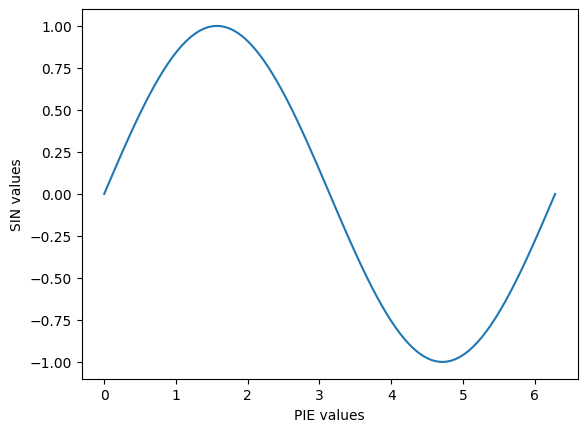

In [51]:
plt.plot(pie_values, sin_values)
plt.xlabel("PIE values")
plt.ylabel("SIN values")